In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('credit_card_fraud_dataset.csv')

In [ ]:
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [3]:
df = df[['Amount',	'MerchantID',	'TransactionType',	'Location',	'IsFraud']]

In [ ]:
df

,Amount,MerchantID,TransactionType,Location,IsFraud
0,4189.27,688,refund,San Antonio,0
1,2659.71,109,refund,Dallas,0
2,784.00,394,purchase,New York,0
3,3514.40,944,purchase,Philadelphia,0
4,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...
99995,1057.29,289,refund,San Antonio,0
99996,297.25,745,refund,San Antonio,0
99997,3448.56,690,purchase,San Antonio,0
99998,3750.79,644,purchase,Philadelphia,0


In [4]:
df_encoded = pd.get_dummies(df, columns=['TransactionType', 'Location'], dtype=int)

In [5]:
df_encoded

,Amount,MerchantID,IsFraud,TransactionType_purchase,TransactionType_refund,Location_Chicago,Location_Dallas,Location_Houston,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose
0,4189.27,688,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2659.71,109,0,0,1,0,1,0,0,0,0,0,0,0,0
2,784.00,394,0,1,0,0,0,0,0,1,0,0,0,0,0
3,3514.40,944,0,1,0,0,0,0,0,0,1,0,0,0,0
4,369.07,475,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1057.29,289,0,0,1,0,0,0,0,0,0,0,1,0,0
99996,297.25,745,0,0,1,0,0,0,0,0,0,0,1,0,0
99997,3448.56,690,0,1,0,0,0,0,0,0,0,0,1,0,0
99998,3750.79,644,0,1,0,0,0,0,0,0,1,0,0,0,0


In [6]:
df_encoded.columns

Index(['Amount', 'MerchantID', 'IsFraud', 'TransactionType_purchase',
       'TransactionType_refund', 'Location_Chicago', 'Location_Dallas',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York',
       'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio',
       'Location_San Diego', 'Location_San Jose'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = df_encoded['IsFraud']
X = df_encoded.drop(columns = ['IsFraud'])

print(X.shape)
print(y.shape)

(100000, 14)
(100000,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 14)
(20000, 14)
(80000,)
(20000,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.6 MB/s eta 0:00:00


In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train_scaled, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 79192, 1: 808})
After Counter({0: 79192, 1: 79192})


#Building neural networks from scratch

####Extended Version of Dr. Atif Riaz Class notebook

In [17]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes1,
                 no_of_hidden_nodes2,
                 learning_rate,
                 optimizer="mini_batch_sgd",  # Choose optimizer
                 l1_lambda=0.0,  # L1 regularization strength
                 l2_lambda=0.0,  # L2 regularization strength
                 hidden_activation="relu",
                 output_activation="sigmoid",
                 dropout_rate=0.0  # Dropout rate
                ):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes1 = no_of_hidden_nodes1
        self.no_of_hidden_nodes2 = no_of_hidden_nodes2
        self.learning_rate = learning_rate
        self.optimizer = optimizer.lower()  # Convert to lowercase for consistency
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.dropout_rate = dropout_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        X = truncated_normal(mean=0, sd=1, low=-0.5, upp=0.5)

        # Create wih1 with shape [hidden1 x in]
        self.wih1 = X.rvs(self.no_of_hidden_nodes1 * self.no_of_in_nodes).reshape(
            (self.no_of_hidden_nodes1, self.no_of_in_nodes)
        )

        # Create wh1h2 with shape [hidden2 x hidden1]
        self.wh1h2 = X.rvs(self.no_of_hidden_nodes2 * self.no_of_hidden_nodes1).reshape(
            (self.no_of_hidden_nodes2, self.no_of_hidden_nodes1)
        )

        # Create who with shape [out x hidden2]
        self.who = X.rvs(self.no_of_out_nodes * self.no_of_hidden_nodes2).reshape(
            (self.no_of_out_nodes, self.no_of_hidden_nodes2)
        )

    # Activation functions
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exps = np.exp(x - np.max(x))
        return exps / np.sum(exps, axis=0, keepdims=True)

    def cross_entropy_loss(self, predictions, targets):
        return -np.sum(targets * np.log(predictions + 1e-15))

    def cross_entropy_derivative(self, predictions, targets):
        return predictions - targets

    def l1_regularization(self, weights):
        return self.l1_lambda * np.sign(weights)

    def l2_regularization(self, weights):
        return self.l2_lambda * weights

    def activate(self, x, function):
        if function == "sigmoid":
            return self.sigmoid(x)
        elif function == "relu":
            return self.relu(x)
        elif function == "softmax":
            return self.softmax(x)
        else:
            raise ValueError("Unknown activation function")

    def activate_derivative(self, x, function):
        if function == "sigmoid":
            return self.sigmoid_derivative(x)
        elif function == "relu":
            return self.relu_derivative(x)
        else:
            raise ValueError("Unknown activation function")

    def apply_dropout(self, activations):
        """Apply dropout to the activations."""
        if self.dropout_rate > 0:
            dropout_mask = np.random.rand(*activations.shape) > self.dropout_rate
            return activations * dropout_mask / (1.0 - self.dropout_rate)  # Scale activations
        return activations

    def train_single(self, input_vector, target_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        # Forward pass with dropout
        hidden_input1 = np.dot(self.wih1, input_vector)
        hidden_output1 = self.activate(hidden_input1, self.hidden_activation)
        hidden_output1 = self.apply_dropout(hidden_output1)  # Apply dropout

        hidden_input2 = np.dot(self.wh1h2, hidden_output1)
        hidden_output2 = self.activate(hidden_input2, self.hidden_activation)
        hidden_output2 = self.apply_dropout(hidden_output2)  # Apply dropout

        final_input = np.dot(self.who, hidden_output2)
        final_output = self.activate(final_input, self.output_activation)

        # Compute loss
        loss = self.cross_entropy_loss(final_output, target_vector)

        # Backward pass
        output_errors = self.cross_entropy_derivative(final_output, target_vector)
        l1_who = self.l1_regularization(self.who)
        l2_who = self.l2_regularization(self.who)
        self.who -= self.learning_rate * (np.dot(output_errors, hidden_output2.T) + l1_who + l2_who)

        hidden_errors2 = np.dot(self.who.T, output_errors)
        hidden_grad2 = hidden_errors2 * self.activate_derivative(hidden_input2, self.hidden_activation)
        l1_wh1h2 = self.l1_regularization(self.wh1h2)
        l2_wh1h2 = self.l2_regularization(self.wh1h2)
        self.wh1h2 -= self.learning_rate * (np.dot(hidden_grad2, hidden_output1.T) + l1_wh1h2 + l2_wh1h2)

        hidden_errors1 = np.dot(self.wh1h2.T, hidden_grad2)
        hidden_grad1 = hidden_errors1 * self.activate_derivative(hidden_input1, self.hidden_activation)
        l1_wih1 = self.l1_regularization(self.wih1)
        l2_wih1 = self.l2_regularization(self.wih1)
        self.wih1 -= self.learning_rate * (np.dot(hidden_grad1, input_vector.T) + l1_wih1 + l2_wih1)

        return loss

    def train_batch(self, batch_data, batch_labels):
        """Train the network on a batch of data."""
        total_loss = 0
        for input_vector, target_vector in zip(batch_data, batch_labels):
            total_loss += self.train_single(input_vector, target_vector)
        return total_loss / len(batch_data)

    # SGD
    def sgd(self, data, labels):
        """Stochastic Gradient Descent (SGD).SGD will Updates weights for every training ."""
        total_loss = 0
        for i in range(len(data)):
            loss = self.train_single(data[i], labels[i])
            total_loss += loss
        return total_loss / len(data)

    # Mini-Batch Optimizer
    def mini_batch_sgd(self, data, labels, batch_size=32):
        """Mini-Batch Stochastic Gradient Descent will update the weight after each batch of training."""
        total_loss = 0
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]
            loss = self.train_batch(batch_data, batch_labels)
            total_loss += loss
        return total_loss / (len(data) // batch_size)

    def train(self, data, labels, batch_size=32):
        """Train the network using the selected optimizer."""
        if self.optimizer == "sgd":
            return self.sgd(data, labels)
        elif self.optimizer == "mini_batch_sgd":
            return self.mini_batch_sgd(data, labels, batch_size)
        else:
            raise ValueError(f"Unknown optimizer: {self.optimizer}")

    def run(self, input_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        hidden_input1 = np.dot(self.wih1, input_vector)
        hidden_output1 = self.activate(hidden_input1, self.hidden_activation)

        hidden_input2 = np.dot(self.wh1h2, hidden_output1)
        hidden_output2 = self.activate(hidden_input2, self.hidden_activation)

        final_input = np.dot(self.who, hidden_output2)
        final_output = self.activate(final_input, self.output_activation)

        return final_output

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
           res = self.run(data[i])  # Get the network's output
           prediction = 1 if res >= 0.5 else 0  # Threshold the sigmoid output
           if prediction == labels[i]:  # Compare prediction with the actual label
                corrects += 1
           else:
                wrongs += 1
        return corrects, wrongs



In [19]:
simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],
    no_of_out_nodes=1,
    no_of_hidden_nodes1=32,
    no_of_hidden_nodes2=16,
    learning_rate=0.01,
    optimizer="mini_batch_sgd",  # Choose optimizer
    dropout_rate=0.1
)


In [21]:
import pandas as pd

y_train_sm = y_train_sm.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [22]:
# Assuming you have initialized X_train, X_test, y_train, y_test

# 1. Initialize your neural network
simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],  # Number of input nodes (features)
    no_of_out_nodes=1,  # Number of output nodes (assuming binary classification)
    no_of_hidden_nodes1=32,  # Number of nodes in hidden layer 1
    no_of_hidden_nodes2=16,  # Number of nodes in hidden layer 2
    learning_rate=0.001,  # Learning rate for optimization
    optimizer="mini_batch_sgd",  # Choose optimizer (e.g., mini-batch SGD)
    l1_lambda=0.001,  # L1 regularization strength
    l2_lambda=0.001,  # L2 regularization strength
    hidden_activation="relu",  # Activation function for hidden layers
    output_activation="sigmoid",  # Output activation function (sigmoid for binary classification)
    dropout_rate=0.1  # Dropout rate (if desired)
)

# 2. Train the neural network on the training data
batch_size = 32  # Adjust batch size as needed
epochs = 20  # Number of epochs (iterations over the training data)

for epoch in range(epochs):
    avg_loss = simple_network.train(X_train_sm, y_train_sm, batch_size=batch_size)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")

# 3. Evaluate the neural network on the test data
corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
total = corrects + wrongs
accuracy = corrects / total
print(f"Accuracy on test set: {accuracy:.2%}")


Epoch 1/20, Average Loss: 0.03833487279857508
Epoch 2/20, Average Loss: 0.04069583225485313
Epoch 3/20, Average Loss: 0.031336535156887904
Epoch 4/20, Average Loss: 0.031065687237094304
Epoch 5/20, Average Loss: 0.03132510563942116
Epoch 6/20, Average Loss: 0.03193899378668733
Epoch 7/20, Average Loss: 0.03247525309659101
Epoch 8/20, Average Loss: 0.03325514506612561
Epoch 9/20, Average Loss: 0.03319415491047816
Epoch 10/20, Average Loss: 0.033729728875577694
Epoch 11/20, Average Loss: 0.033661762870755944
Epoch 12/20, Average Loss: 0.03387679147520397
Epoch 13/20, Average Loss: 0.03411891675796268
Epoch 14/20, Average Loss: 0.034012497141717675
Epoch 15/20, Average Loss: 0.0349935410458255
Epoch 16/20, Average Loss: 0.034574652782321504
Epoch 17/20, Average Loss: 0.034624039153099716
Epoch 18/20, Average Loss: 0.03498708156025744
Epoch 19/20, Average Loss: 0.0350332274164265
Epoch 20/20, Average Loss: 0.03556918824959102
Accuracy on test set: 0.96%


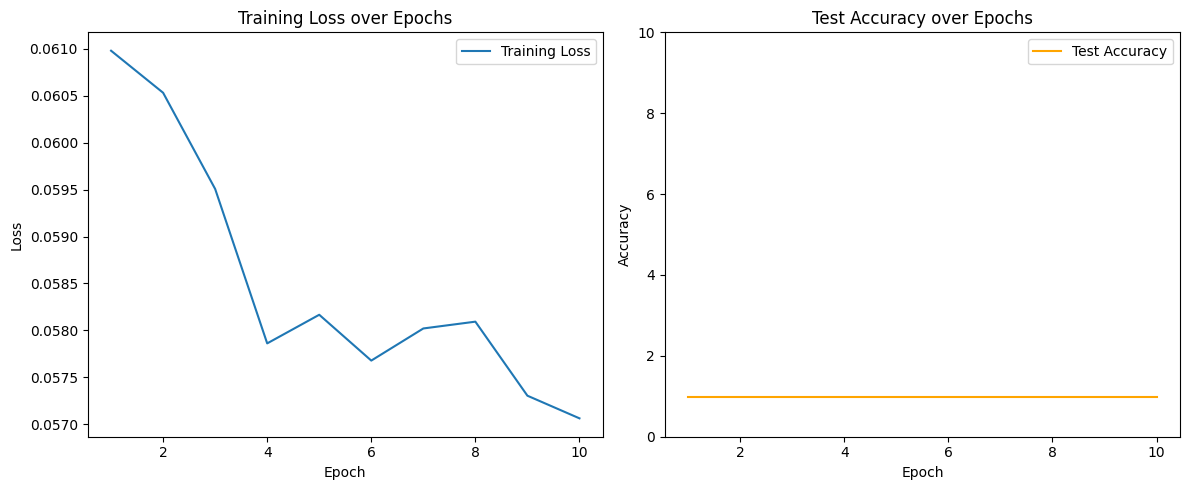

In [23]:
import matplotlib.pyplot as plt

# Example training loop
epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    # Training step, collect train_losses
    train_loss = simple_network.train(X_train_scaled, y_train)
    train_losses.append(train_loss)

    # Evaluation step, collect test accuracies
    corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
    total = corrects + wrongs
    accuracy = corrects / total
    test_accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.ylim([0, 10])
plt.legend()

plt.tight_layout()
plt.show()


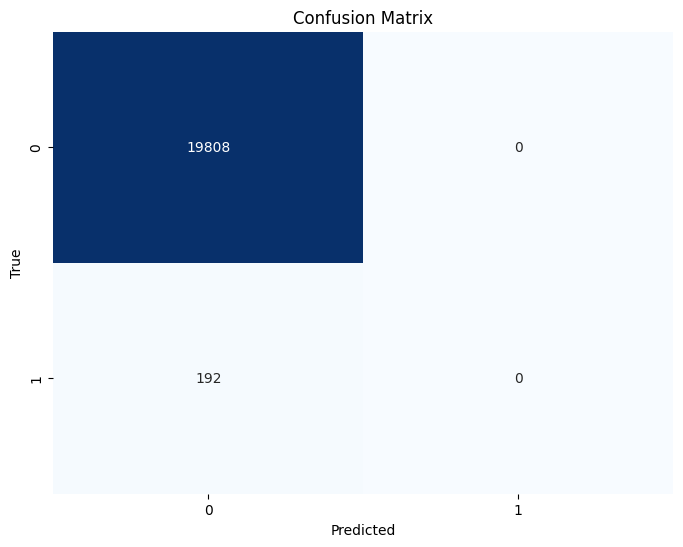

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19808
           1       0.00      0.00      0.00       192

    accuracy                           0.99     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions on test set
predictions = [1 if simple_network.run(x) >= 0.5 else 0 for x in X_test_scaled]

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, predictions))


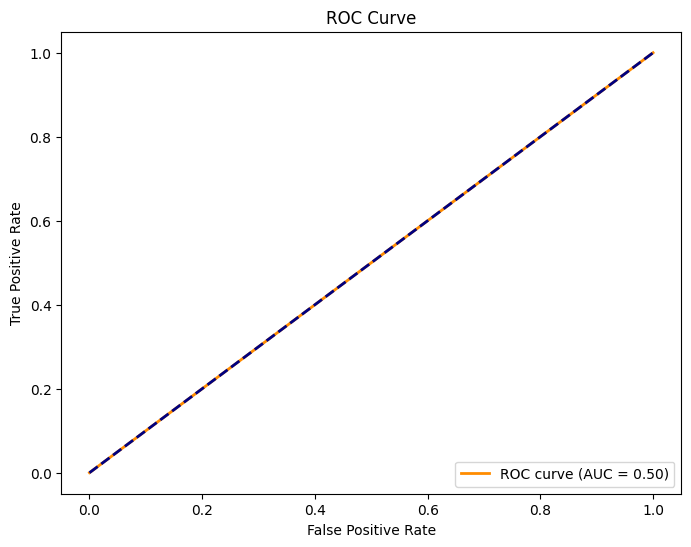

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


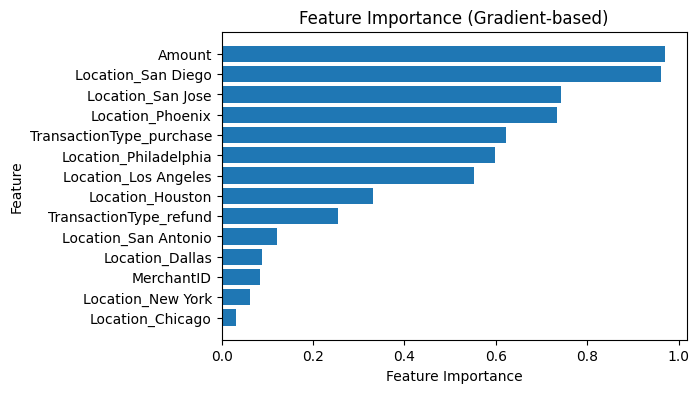

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Example function for gradient-based feature importance (adjust as needed)
def gradient_based_feature_importance(simple_network, X_test_scaled, y_test):
    inputs = np.array(X_test, dtype=float)
    inputs.requires_grad = True  # Enable gradient calculation

    outputs = simple_network.run(inputs)
    loss = simple_network.cross_entropy_loss(outputs, y_test)  # Assuming y_test is your true labels
    loss.backward()

    # Calculate feature importance as absolute gradients
    importance = np.abs(inputs.grad.numpy()).mean(axis=0)

    return importance


# If you are using pandas, you can get feature names as follows:
feature_names = ['Amount', 'MerchantID', 'TransactionType_purchase',
       'TransactionType_refund', 'Location_Chicago', 'Location_Dallas',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York',
       'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio',
       'Location_San Diego', 'Location_San Jose']



importance = np.random.rand(X_test.shape[1])  # Random importance values for the example
sorted_idx = np.argsort(importance)

# Plotting feature importance with column names
plt.figure(figsize=(6, 4))
plt.barh(range(len(feature_names)), importance[sorted_idx], align='center')
plt.yticks(range(len(feature_names)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Gradient-based)')
plt.show()
